In [29]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
random.seed(6202)

Populating the interactive namespace from numpy and matplotlib


M:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma', 'beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [30]:
def gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    X = zeros(Nsteps)
    X[0] = x0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        u = rand(1)[0]
        rate = beta/eps if N[j-1]==high else alpha/eps
        tau = -log(u)/rate
        T[j] = T[j-1] + tau
        N[j] = low if N[j-1]==1 else high
        ## update x using the exact solution above
        X[j] = X[j-1]*exp(-delta*tau) + gamma*N[j-1]/delta*(1 - exp(-delta*tau)) 
    return [T, X];

def gene_express2(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps):
    N = zeros(Nsteps)
    N[0] = n0
    X = zeros(Nsteps)
    X[0] = x0
    T = zeros(Nsteps)
    T[0] = 0
    for j in arange(1, Nsteps):
        u = rand(1)[0]
        rate = beta/eps if N[j-1]==high else (X[j-1]*eps)**2
        tau = -log(u)/rate
        T[j] = T[j-1] + tau
        N[j] = low if N[j-1]==1 else high
        ## update x using the exact solution above
        X[j] = X[j-1]*exp(-delta*tau) + gamma*N[j-1]/delta*(1 - exp(-delta*tau)) 
    return [T, X];

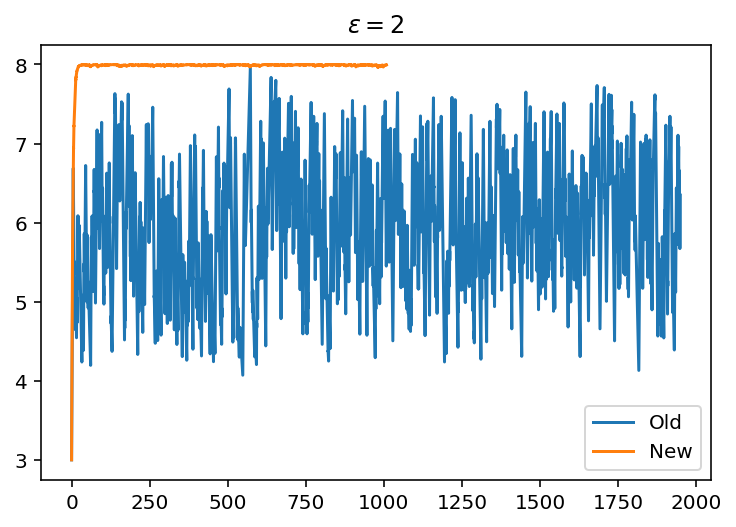

In [31]:
eps = 2
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
high = 1
low = 0.5
n0 = high
x0 = 3
Nsteps = 1000
M1 = gene_express2(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
M2 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
Tinf = linspace(0, M1[0][-1], 200)
Navg = alpha/(alpha + beta)*high + beta/(alpha+beta)*low
Xinf = x0*exp(-delta*Tinf) + gamma*Navg/delta*(1 - exp(-delta*Tinf))
plot(M2[0], M2[1],label="Old")    
plot(M1[0], M1[1],label="New")
title(r"$\epsilon=2$")
legend()

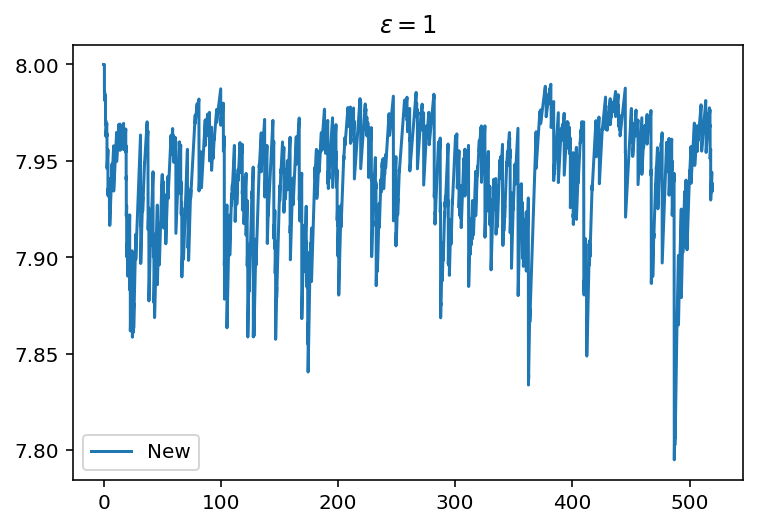

In [32]:
eps = 1
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
high = 1
low = 0.5
n0 = high
x0 = 8
Nsteps = 1000
M1 = gene_express2(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
M2 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
Tinf = linspace(0, M1[0][-1], 200)
Navg = alpha/(alpha + beta)*high + beta/(alpha+beta)*low
Xinf = x0*exp(-delta*Tinf) + gamma*Navg/delta*(1 - exp(-delta*Tinf))
#plot(M2[0], M2[1],label="Old")    
plot(M1[0], M1[1],label="New")
title(r"$\epsilon=1$")
legend()

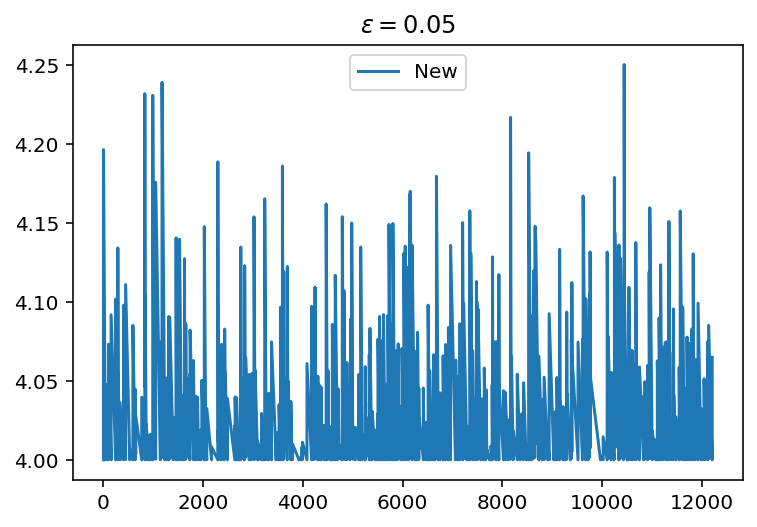

In [33]:
eps = 0.05
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
high = 1
low = 0.5
n0 = high
x0 = 4
Nsteps = 1000
M1 = gene_express2(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
M2 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
Tinf = linspace(0, M1[0][-1], 200)
Navg = alpha/(alpha + beta)*high + beta/(alpha+beta)*low
Xinf = x0*exp(-delta*Tinf) + gamma*Navg/delta*(1 - exp(-delta*Tinf))
#plot(M2[0], M2[1],label="Old")    
plot(M1[0], M1[1],label="New")
title(r"$\epsilon=0.05$")
legend()

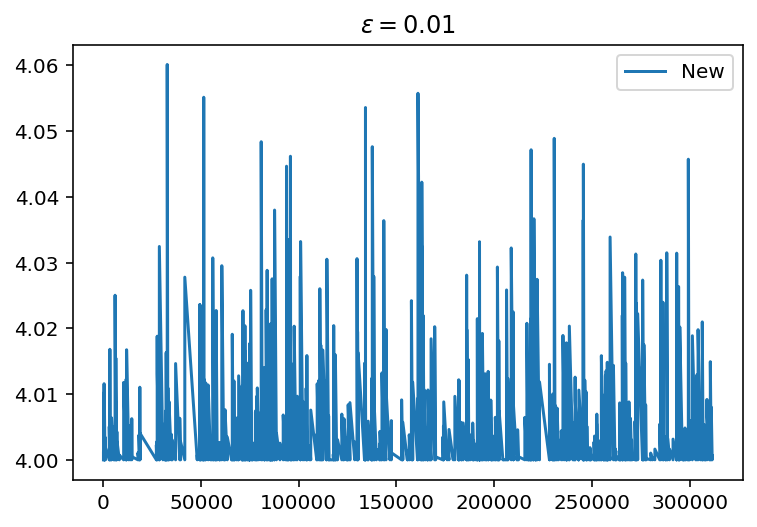

In [34]:
eps = 0.01
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
high = 1
low = 0.5
n0 = high
x0 = 4
Nsteps = 1000
M1 = gene_express2(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
M2 = gene_express(eps,gamma,delta,alpha,beta,high,low,n0,x0,Nsteps)
Tinf = linspace(0, M1[0][-1], 200)
Navg = alpha/(alpha + beta)*high + beta/(alpha+beta)*low
Xinf = x0*exp(-delta*Tinf) + gamma*Navg/delta*(1 - exp(-delta*Tinf))
#plot(M2[0], M2[1],label="Old")    
plot(M1[0], M1[1],label="New")
title(r"$\epsilon=0.01$")
legend()